# Lecture 9 - Exploratory Analysis "Cold Open"

#### Announcements:
* Lab # Survey is now "Week # Survey"
* Straw poll on Discord: pick your own partner, or preassigned?

#### Goals:
* Practice exploring a dataset from zero.
* Please help Scott!

The data:

In [1]:
data_url = "https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/data/yellow_tripdata_2018-06_small.csv"

The data came from here: [http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml](http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml).

It was preprocessed by a friend using [this notebook](https://fw.cs.wwu.edu/~wehrwes/courses/data311_21f/lectures/L09/taxi_data_cleaning.ipynb). I think he told me he pulled out a subset of columns and subsampled the rows, but I don't know any more than that.

# ...go!

In [5]:
import pandas as pd

df = pd.read_csv(data_url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435692 entries, 0 to 435691
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        435692 non-null  int64  
 1   time_elapsed_min  435692 non-null  int64  
 2   passenger_count   435692 non-null  int64  
 3   trip_distance     435692 non-null  float64
 4   payment_type      435692 non-null  int64  
 5   fare_amount       435692 non-null  float64
 6   tip_amount        435692 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 23.3 MB


In [4]:
df.describe()

Unnamed: 0  time_elapsed_min  passenger_count  trip_distance  \
count  4.356920e+05     435692.000000    435692.000000  435692.000000   
mean   4.357742e+06         17.155027         1.599605       3.012505   
std    2.513988e+06         64.953021         1.245546       3.843959   
min    2.300000e+01          0.000000         0.000000       0.000000   
25%    2.181294e+06          6.000000         1.000000       1.000000   
50%    4.362138e+06         11.000000         1.000000       1.660000   
75%    6.530340e+06         18.000000         2.000000       3.100000   
max    8.713817e+06       1439.000000         9.000000      69.460000   

        payment_type    fare_amount     tip_amount  
count  435692.000000  435692.000000  435692.000000  
mean        1.314178      13.267334       1.906684  
std         0.485448      11.798141       2.605647  
min         1.000000    -126.000000      -1.820000  
25%         1.000000       6.500000       0.000000  
50%         1.000000       9.500000       1.450000  
75%         2.000000      15.000000       2.460000  
max         4.000000     480.000000     175.000000

* tips!
    * vs time elapsed
    * vs distance
    * vs cost
    * vs # passengers

In [8]:
df["payment_type"].value_counts()

1    302555
2    130039
3      2448
4       650
Name: payment_type, dtype: int64

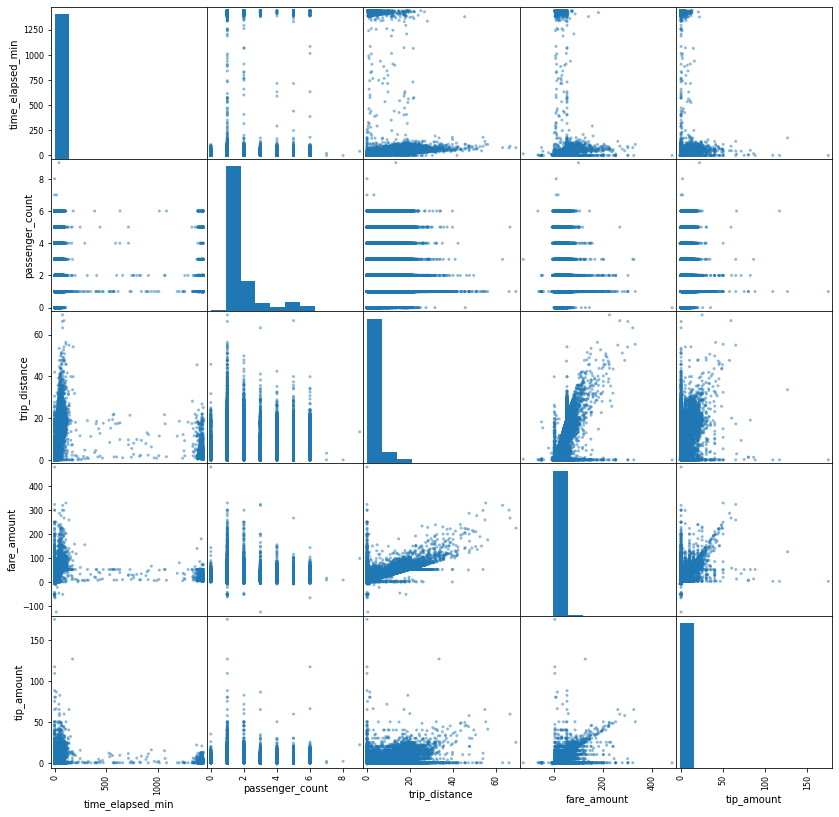

In [14]:
pd.plotting.scatter_matrix(df[["time_elapsed_min","passenger_count", "trip_distance", "fare_amount", "tip_amount"]], figsize=(14, 14));


Unnamed: 0  time_elapsed_min  passenger_count  trip_distance  \
count  1.300390e+05     130039.000000    130039.000000  130039.000000   
mean   4.378039e+06         16.753089         1.635271       2.664664   
std    2.530190e+06         71.676311         1.265760       3.581286   
min    4.100000e+01          0.000000         0.000000       0.000000   
25%    2.227600e+06          5.000000         1.000000       0.880000   
50%    4.438654e+06         10.000000         1.000000       1.460000   
75%    6.584410e+06         17.000000         2.000000       2.730000   
max    8.713804e+06       1439.000000         7.000000      66.300000   

       payment_type    fare_amount     tip_amount  
count      130039.0  130039.000000  130039.000000  
mean            2.0      12.142102       0.000018  
std             0.0      10.745946       0.006655  
min             2.0     -52.000000       0.000000  
25%             2.0       6.000000       0.000000  
50%             2.0       8.500000       0.000000  
75%             2.0      14.000000       0.000000  
max             2.0     300.000000       2.400000

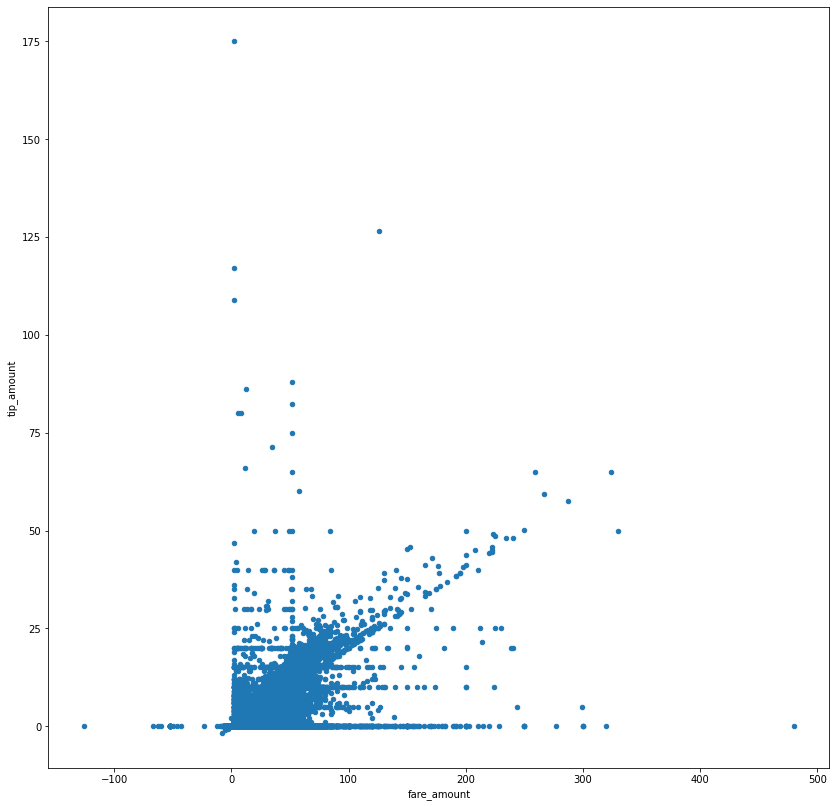

In [13]:
df.plot.scatter("fare_amount", "tip_amount", figsize=(14,14))


In [ ]:
df[df["payment_type"] == 2].describe()

In [ ]:
df.plot.scatter("fare_amount", "tip_amount", figsize=(14,14))


Fun question I came up with when posting this notebook:

> Could we deduce the formula for calculating the fare from the data? In other words, can we predict the fare column from the elapsed time and distance columns?